In [40]:
import sys
import os
import scipy
import gzip
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [41]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [42]:
answer_f = open('/data/project/Alzheimer/YSscript/EM_MRS/data/npvaf/simulation_2D/decoy/0.1/clone_4/2/npvaf.txt','r')

input_dir = '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/simulation_2D/decoy/0.1/clone_4/2/'

clement_f = open(input_dir + 'CLEMENT_hard_1st.membership.txt','r')
clement_list = []
for fline in clement_f:
    membership = str(fline.rstrip())

    clement_list.append(membership)
clement_f.close()
print(len(clement_list))

pyclone_f = open(input_dir + 'pyclonevi.membership.txt','r')
pyclone_list = []
for fline in pyclone_f:
    membership = str(fline.rstrip())
    pyclone_list.append(membership)
pyclone_f.close()
print(len(pyclone_list))

sciclone_f = open(input_dir + 'sciclone.membership.txt','r')
sciclone_list = []
for fline in sciclone_f:
    membership = str(fline.rstrip())
    sciclone_list.append(membership)
sciclone_f.close()
print(len(sciclone_list))

quantum_f = open(input_dir + 'quantumclone.membership.txt','r')
quantum_list = []
for fline in quantum_f:
    membership = str(fline.rstrip())
    quantum_list.append(membership)
quantum_f.close()
print(len(quantum_list))


answer_df = pd.DataFrame(columns=['ID','block1','block2','CLUSTER'])
clement_df = pd.DataFrame(columns=['ID','block1','block2','CLUSTER'])
pyclone_df = pd.DataFrame(columns=['ID','block1','block2','CLUSTER'])
sciclone_df = pd.DataFrame(columns=['ID','block1','block2','CLUSTER'])
quantum_df = pd.DataFrame(columns=['ID','block1','block2','CLUSTER'])

idx = 0
for fline in answer_f:
    ftab = fline.rstrip().split('\t')
    if ftab[0] == '':
        continue
    ID = ftab[0]
#     block1_depth = int(ftab[2].rstrip().split(',')[0])
#     block1_alt = int(ftab[2].rstrip().split(',')[1])
#     block2_depth = int(ftab[2].rstrip().split(',')[2])
#     block2_alt = int(ftab[2].rstrip().split(',')[3])
    
#     block1_vaf = float(ftab[1])*2
#     block2_vaf = float(ftab[2])*2
    block1_vaf = float(ftab[1])
    block2_vaf = float(ftab[2])
    
    membership = ftab[3]
    
    answer_df.loc[idx] = ID, block1_vaf, block2_vaf, membership
    
    clement_df.loc[idx] = ID, block1_vaf, block2_vaf, clement_list[idx]
    pyclone_df.loc[idx] = ID, block1_vaf, block2_vaf, pyclone_list[idx]
    sciclone_df.loc[idx] = ID, block1_vaf, block2_vaf, sciclone_list[idx]
    quantum_df.loc[idx] = ID, block1_vaf, block2_vaf, quantum_list[idx]
    
    idx += 1
answer_f.close()

500
500
500
500


In [43]:
answer_df

,ID,block1,block2,CLUSTER
0,mut_0,0.15,0.16,0
1,mut_1,0.09,0.14,0
2,mut_2,0.12,0.21,0
3,mut_3,0.16,0.19,0
4,mut_4,0.13,0.15,0
...,...,...,...,...
495,mut_495,0.00,0.03,FP
496,mut_496,0.00,0.02,FP
497,mut_497,0.01,0.02,FP
498,mut_498,0.00,0.03,FP


In [62]:
day = '230420'
dot_size = 500
output_dir = '/data/project/Alzheimer/EM_cluster/00.RESULT/'+day+'/00.simData/example'

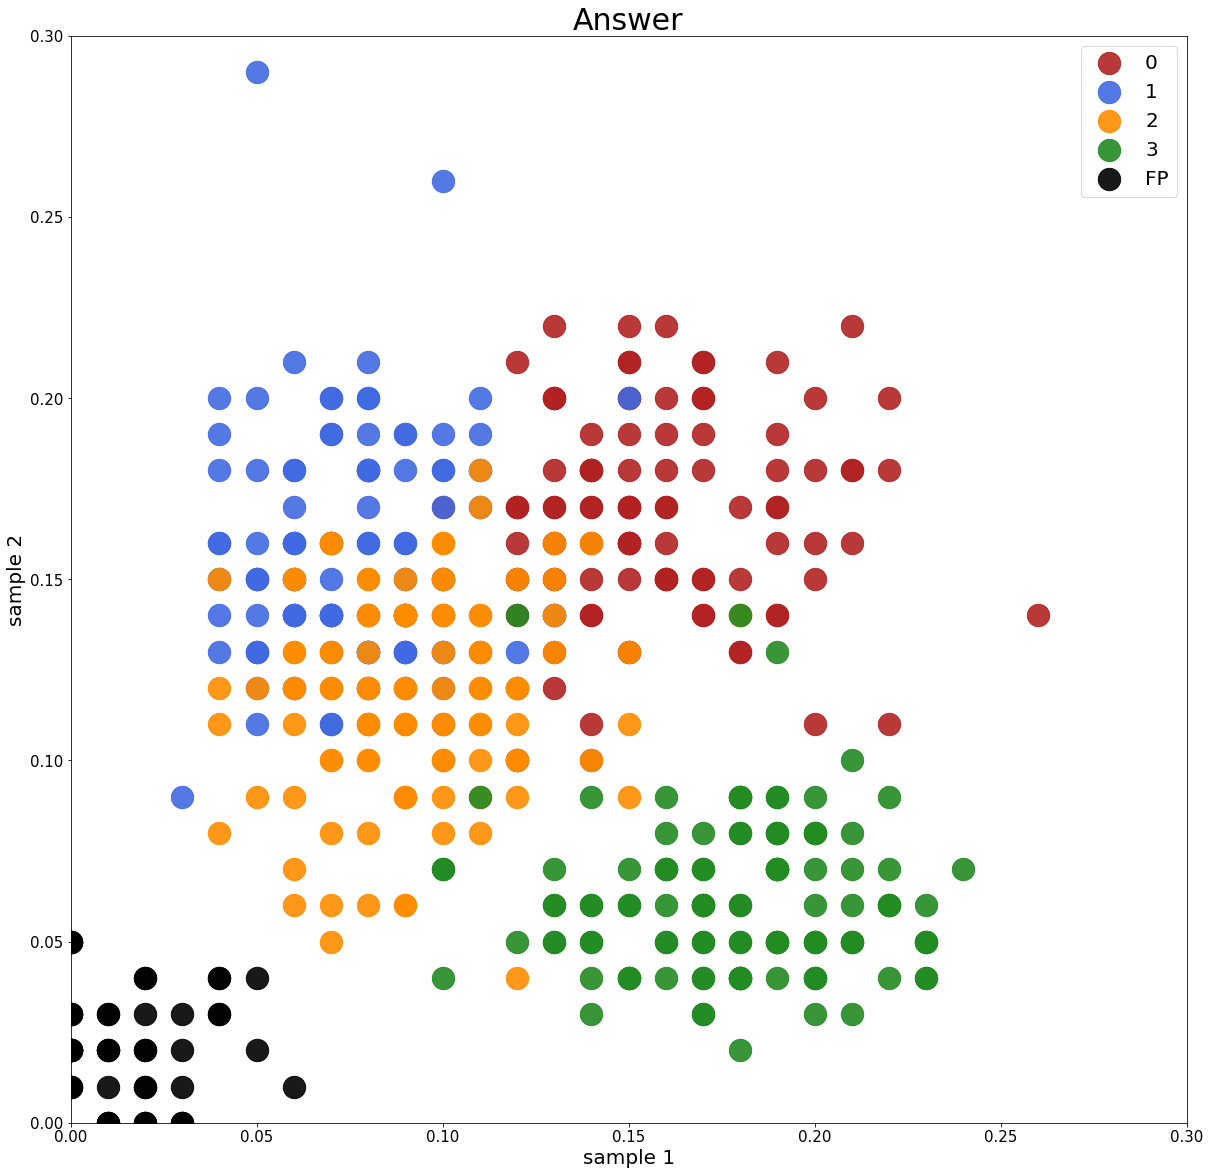

In [63]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('sample 1', fontsize = 20)
ax.set_ylabel('sample 2', fontsize = 20)
ax.set_title('Answer', fontsize=30)
# sc = ax.set_xlim(0, 1.0); ax.set_ylim(0, 1.0)
sc = ax.set_xlim(0, 0.3); ax.set_ylim(0, 0.3)

for group_name, group_idx in answer_df.groupby('CLUSTER').groups.items():
    y = answer_df.iloc[group_idx,2]
    x = answer_df.iloc[group_idx,1]
#     ax.scatter(x,y, alpha = 0.9, s=300,color='firebrick')

    # color_list = firebrick royalblue darkorange forestgreen mediumorchid
    
    if group_name == '0':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='firebrick')
    elif group_name == '1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='royalblue')
    elif group_name == '2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='darkorange')
    elif group_name == '3':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='forestgreen')
    elif group_name == 'S0,V2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='mediumorchid')       
    elif group_name == 'FP':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='black')
ax.legend(loc = 'upper right', fontsize = 20)        
ax.figure.savefig(output_dir + '/2D_Answer.pdf')

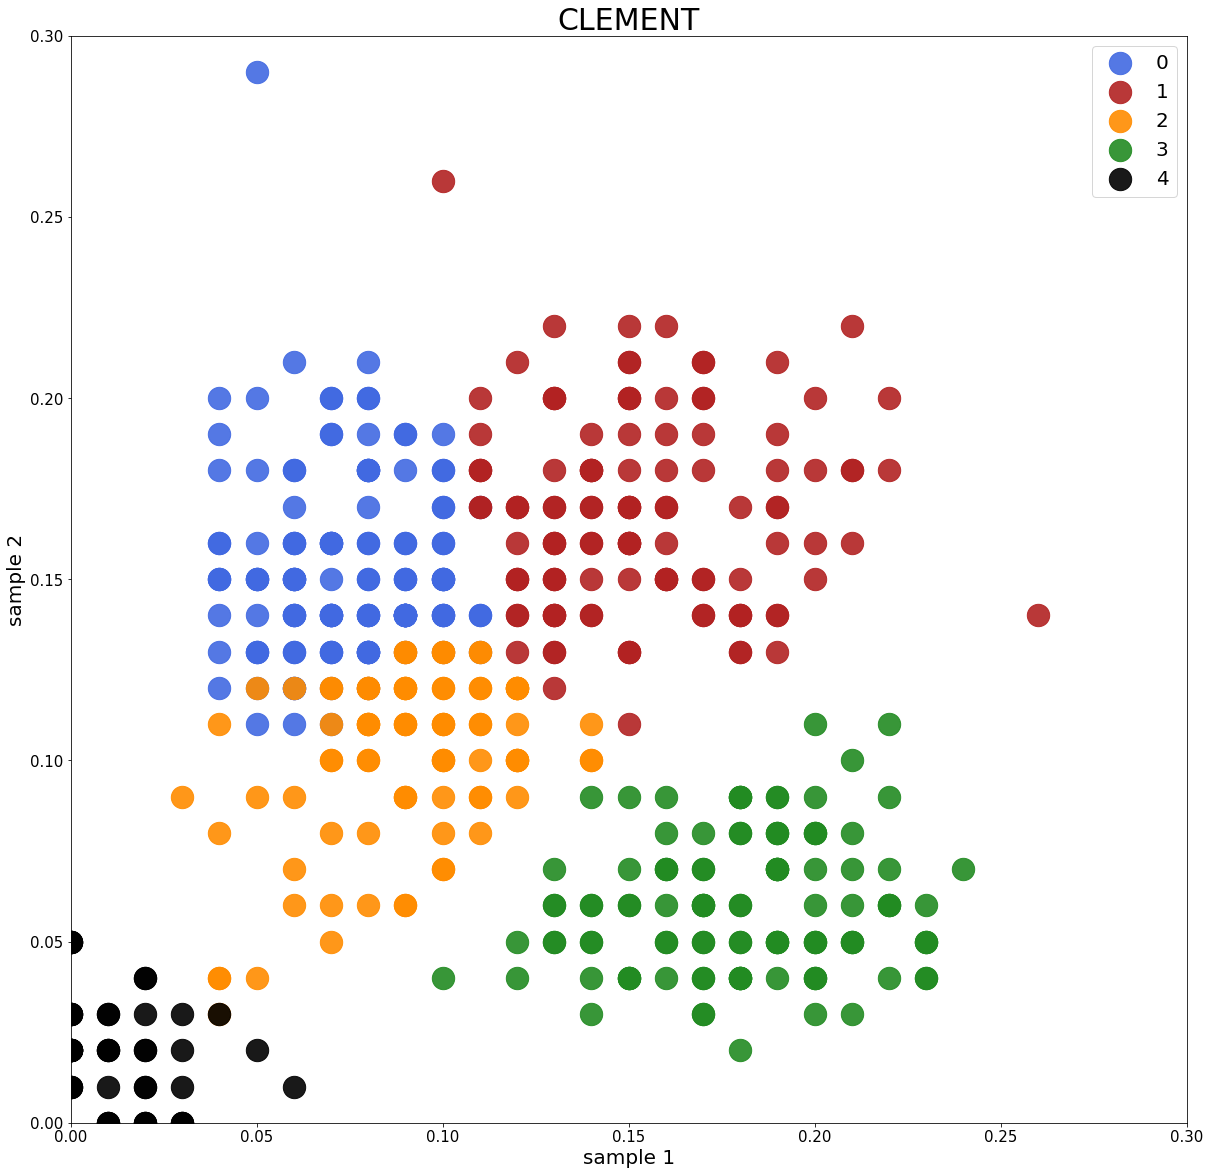

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('sample 1', fontsize = 20)
ax.set_ylabel('sample 2', fontsize = 20)
ax.set_title('CLEMENT', fontsize=30)
sc = ax.set_xlim(0, 0.3); ax.set_ylim(0, 0.3)

for group_name, group_idx in clement_df.groupby('CLUSTER').groups.items():
    y = answer_df.iloc[group_idx,2]
    x = answer_df.iloc[group_idx,1]
    
    # color_list = firebrick royalblue darkorange forestgreen mediumorchid
    
    if group_name == '0':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='royalblue') 
    elif group_name == '1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='firebrick') 
    elif group_name == '2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='darkorange')
    elif group_name == '3':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='forestgreen')
    elif group_name == 'S0,V2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='mediumorchid')       
    elif group_name == '4':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='black')
ax.legend(loc = 'upper right', fontsize = 20)        
ax.figure.savefig(output_dir + '/2D_CLEMENT.pdf')

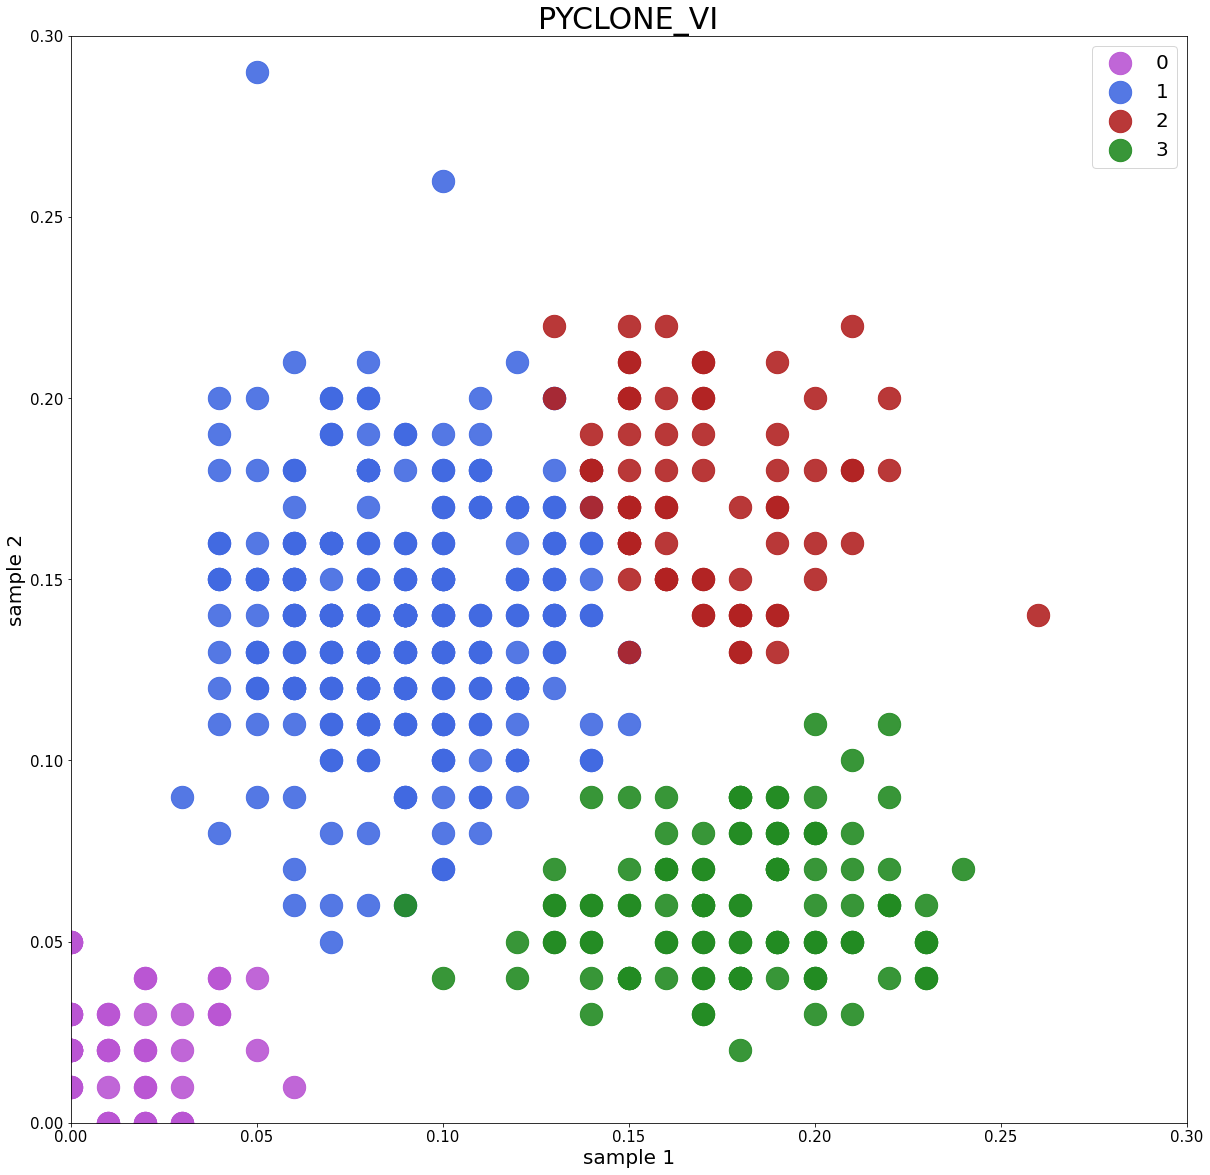

In [65]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('sample 1', fontsize = 20)
ax.set_ylabel('sample 2', fontsize = 20)
ax.set_title('PYCLONE_VI', fontsize=30)
sc = ax.set_xlim(0, 0.3); ax.set_ylim(0, 0.3)

for group_name, group_idx in pyclone_df.groupby('CLUSTER').groups.items():
    y = answer_df.iloc[group_idx,2]
    x = answer_df.iloc[group_idx,1]
    # color_list = firebrick royalblue darkorange forestgreen mediumorchid
    
    if group_name == '0':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='mediumorchid') 
    elif group_name == '1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='royalblue')
    elif group_name == '2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='firebrick') 
    elif group_name == '3':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='forestgreen')
    elif group_name == 'S0,V2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='black')       
    elif group_name == 'FP':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='darkorange')        
        
        
ax.legend(loc = 'upper right', fontsize = 20)        
ax.figure.savefig(output_dir + '/2D_PYCLONE.pdf')

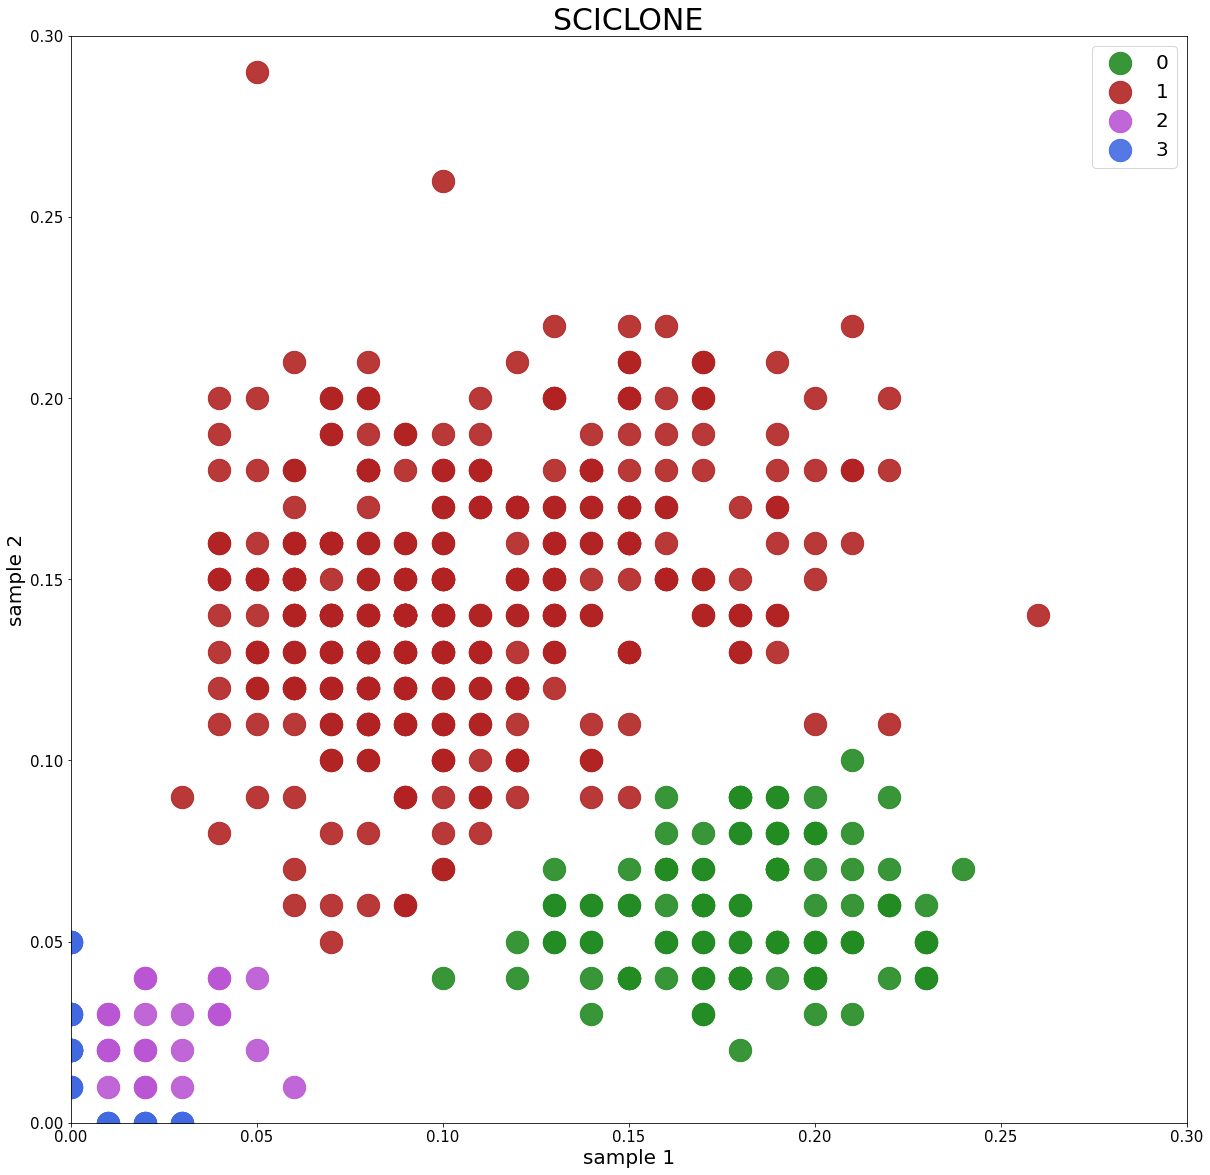

In [66]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('sample 1', fontsize = 20)
ax.set_ylabel('sample 2', fontsize = 20)
ax.set_title('SCICLONE', fontsize=30)
sc = ax.set_xlim(0, 0.3); ax.set_ylim(0, 0.3)

for group_name, group_idx in sciclone_df.groupby('CLUSTER').groups.items():
    y = answer_df.iloc[group_idx,2]
    x = answer_df.iloc[group_idx,1]
    # color_list = firebrick royalblue darkorange forestgreen mediumorchid
    
    if group_name == '0':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='forestgreen')
    elif group_name == '1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='firebrick')
    elif group_name == '2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='mediumorchid')
    elif group_name == '3':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='royalblue')
    elif group_name == 'S0,V2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='darkorange')       
    elif group_name == 'FP':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='black')     
        
        
ax.legend(loc = 'upper right', fontsize = 20)        
ax.figure.savefig(output_dir + '/2D_SCICLONE.pdf')

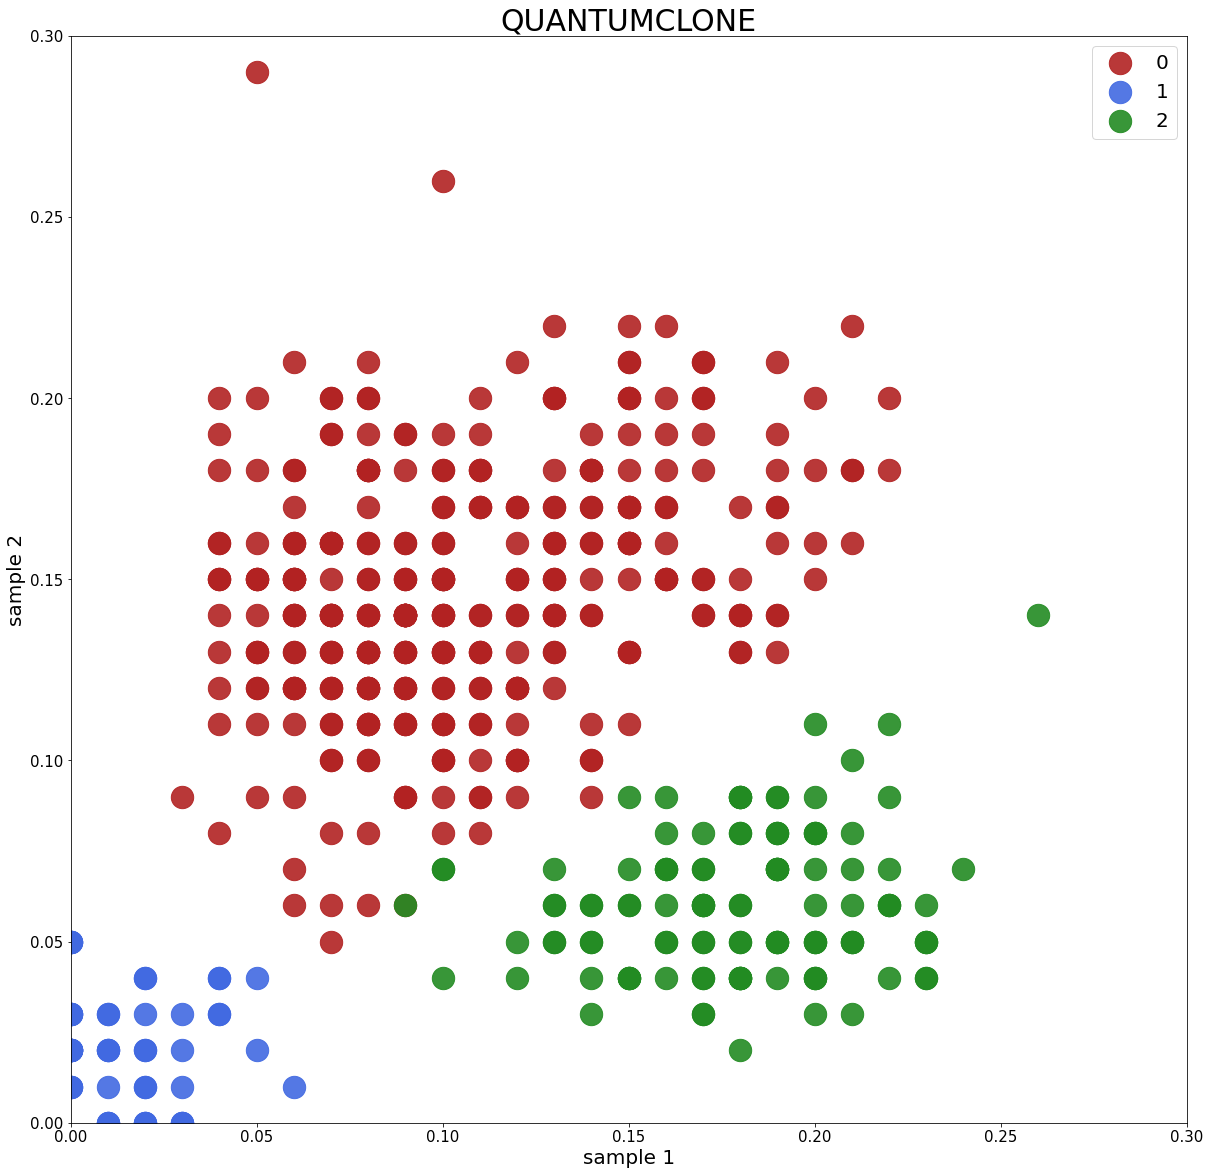

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('sample 1', fontsize = 20)
ax.set_ylabel('sample 2', fontsize = 20)
ax.set_title('QUANTUMCLONE', fontsize=30)
sc = ax.set_xlim(0, 0.3); ax.set_ylim(0, 0.3)

for group_name, group_idx in quantum_df.groupby('CLUSTER').groups.items():
    y = answer_df.iloc[group_idx,2]
    x = answer_df.iloc[group_idx,1]
    # color_list = firebrick royalblue darkorange forestgreen mediumorchid
    
#     if group_name == '7':
#         ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='mediumorchid') 
#     elif group_name == '2':
#         ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='peru')
#     elif group_name == '5':
#         ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='darkorange')
#     elif group_name == '6':
#         ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='forestgreen')
#     elif group_name == '3':
#         ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='royalblue') 
#     elif group_name == '0':
#         ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='firebrick')  
#     elif group_name == '1':
#         ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='gold')   
#     elif group_name == '4':
#         ax.scatter(x,y, label=group_name, alpha = 0.9, s=650,color='grey')  
    if group_name == '0':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='firebrick')
    elif group_name == '1':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='royalblue')
    elif group_name == '2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='forestgreen')
    elif group_name == '3':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='darkorange')
    elif group_name == 'S0,V2':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='mediumorchid')       
    elif group_name == 'FP':
        ax.scatter(x,y, label=group_name, alpha = 0.9, s=dot_size,color='black')
ax.legend(loc = 'upper right', fontsize = 20)

ax.figure.savefig(output_dir + '/2D_QUANTUMCLONE.pdf')